In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


## About Dataset

Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

   Customers who left within the last month – the column is called Churn
   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and      streaming TV and movies
   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
   Demographic info about customers – gender, age range, and if they have partners and dependents

Inspiration

To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [27]:
# loading the dataset 
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


there is 21 columns in the dataset some of them are clear and some of them need to additional explanation

tenure -> Number of months the customer has stayed with the company

SeniorCitizen -> Whether the customer is a senior citizen or not (1, 0)

Contract -> The contract term of the customer (Month-to-month, One year, Two year)

PaymentMethod -> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Churn -> Whether the customer churned or not (Yes or No)

In [28]:
# general informations about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
# checking dataset for empty cells
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
# checking variety of our columns
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [31]:
# calculate percentage of unique values in each columns
for i in df.drop(columns=['customerID','tenure','MonthlyCharges','TotalCharges']):
    print(f'\n{df[i].value_counts()/len(df) * 100}\n')


Male      50.47565
Female    49.52435
Name: gender, dtype: float64


0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64


No     51.69672
Yes    48.30328
Name: Partner, dtype: float64


No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64


Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64


No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64


Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64


No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64


No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: OnlineBackup, dtype: float64


No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64


N

## Data cleaning

In [32]:
from sklearn.preprocessing import MinMaxScaler

Im going to design a pandas pipeline to automate data cleaning and 

In [33]:
# define a function for droping columns
def col_drop(df, col):
    df.drop(columns=col, inplace=True)
    return df

# define a function to drop rows with empty cells
def nan_cleaner(df,col):
    for i in range(len(df)):
        if df[col][i] == " ":
            df.drop(index=i,inplace=True)
    df.reset_index(drop=True,inplace=True)
    df[col] = pd.to_numeric(df[col],downcast="float")
    return df

# define a function to replace cells values
def no_internet_to_no(df, col):
    for i in df[col]:
        for j in range(len(df)):
            if df.loc[j, i] == 'No internet service':
                df.loc[j, i] = 'No'
    return df

def no_phone_service_to_no(df, col):
    for i in df[col]:
        for j in range(len(df)):
            if df.loc[j, i] == 'No phone service':
                df.loc[j, i] = 'No'
    return df

# maping yes and no to numeric values
def yes_no_transformer(df):
    mapping = {'No': 0, 'Yes': 1}
    df = df.replace(mapping)
    return df

# maping female and male to numeric values
def female_male_transformer(df):
    mapping = {'Female': 0, 'Male': 1}
    df = df.replace(mapping)
    return df

# define a function for one hot encoding
def encoder(df,col):
    df = pd.get_dummies(df,columns=col)
    return df

# define a scaler function that use MinMaxScaler
def scaler(df,col):
    scaler = MinMaxScaler()
    for i in col:
        df[i] =  scaler.fit_transform(df[i].values.reshape(-1, 1))
    return df

# the customerID give us no important informations about our customer so we can drop it from our data set
drop_col = ['customerID']
# in columns that listed below i think we can change no internet to no without any huge efects on our result
no_internet_col = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']
# in column that listed below i think we can change no phone service to no without any huge efects on our result
no_phone_service_col = ['MultipleLines']
# these columns that listed below need to encode to numeric values with one hot encoding
columns_to_encode = ['PaymentMethod','Contract','InternetService']
# the columns need scaling
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']
# the columns that has null(" ") values
col_to_clean = 'TotalCharges'

In [34]:
# apply our pipelines to our dataset
df = df.pipe(nan_cleaner,col_to_clean).pipe(col_drop,drop_col).pipe(encoder,columns_to_encode).pipe(no_internet_to_no,no_internet_col).pipe(no_phone_service_to_no,no_phone_service_col).pipe(yes_no_transformer).pipe(female_male_transformer).pipe(scaler,columns_to_scale)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,0.323944,1,1,1,0,1,...,0,0,0,1,0,1,0,1,0,0
7028,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
7029,0,0,1,1,0.140845,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
7030,1,1,1,0,0.042254,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

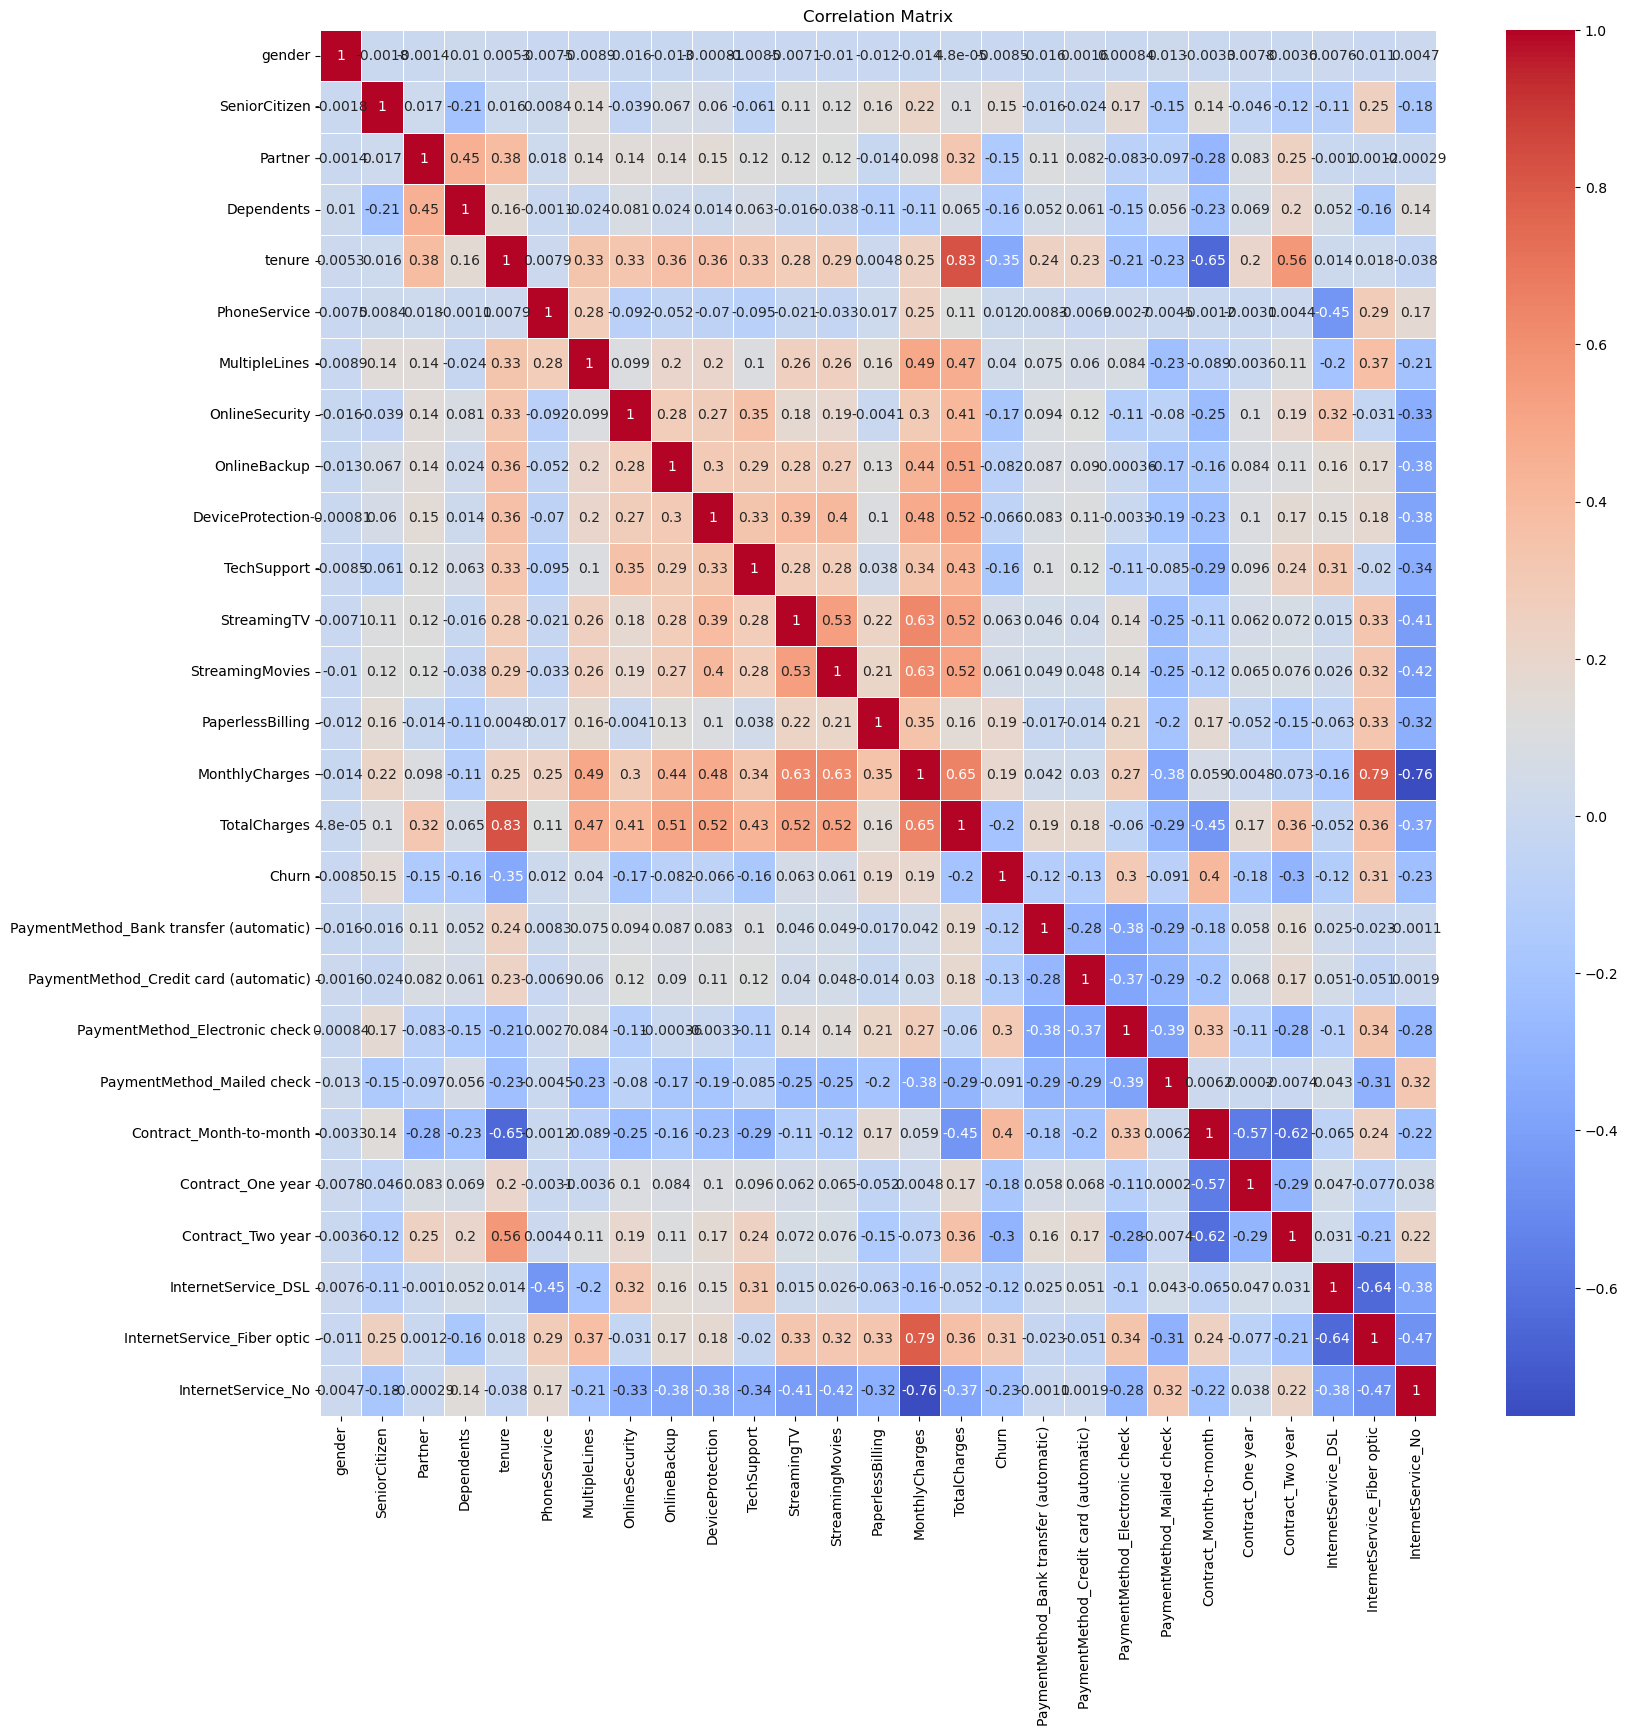

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlations = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Creating models for peredicting churn

In [37]:
# firs of all we going to divide our dataset to X and y(churn columns)
X = df.drop(columns=['Churn'])
y = df['Churn']

# now we should divide our dataset to train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=44)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4922, 26), (4922,), (2110, 26), (2110,))

**classification using LogisticRegression**

In [38]:
# now Im going to apply PCA to our dataset and train our models with and without PCA to see which one works better
# for my first model I use LogisticRegression
import time
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# first apply LogisticRegression on dataset that reduct with PCA
start_time = time.time()
reg_pipeline = make_pipeline(
    PCA(n_components=10), #PCA
    LogisticRegression(random_state=45) # Logistic regression
)

# Fit the pipeline on the training data
reg_pipeline.fit(X_train,y_train)
reg_pca_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_reg_pca = reg_pipeline.score(X_test, y_test)
reg_pca_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_reg_pca}, Training Time: {reg_pca_train_time}, Validation Time: {reg_pca_val_time}")

Accuracy: 0.7928909952606635, Training Time: 0.054993629455566406, Validation Time: 0.007047891616821289


In [39]:
# now train LogisticRegression model on X_train drictly(without PCA)
start_time = time.time()
reg = LogisticRegression(random_state=45)

# Fit the model on the training data
reg.fit(X_train, y_train)
reg_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_reg = reg.score(X_test, y_test)
reg_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_reg}, Training Time: {reg_train_time}, Validation Time: {reg_val_time}")

Accuracy: 0.8023696682464455, Training Time: 0.10394859313964844, Validation Time: 0.007294178009033203


**classification using RandomForestClassifier**

In [40]:
# Im going to use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC

start_time = time.time()
rfc_pipline = make_pipeline(
    PCA(n_components=10), # PCA
    RFC(n_estimators=20, random_state=45) # Random Forest Classifier
)

# Fit the pipeline on the training data
rfc_pipline.fit(X_train,y_train)
rfc_pca_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_rfc_pca = rfc_pipline.score(X_test, y_test)
rfc_pca_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_rfc_pca}, Training Time: {rfc_pca_train_time}, Validation Time: {rfc_pca_val_time}")

Accuracy: 0.7606635071090048, Training Time: 0.4730088710784912, Validation Time: 0.025656700134277344


In [41]:
# now train RandomForestClassifier model on X_train drictly(without PCA)
start_time = time.time()
rfc = RFC(n_estimators=20, random_state=45)

# Fit the model on the training data
rfc.fit(X_train, y_train)
rfc_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_rfc = rfc.score(X_test, y_test)
rfc_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_rfc}, Training Time: {rfc_train_time}, Validation Time: {rfc_val_time}")

Accuracy: 0.7829383886255924, Training Time: 0.20613646507263184, Validation Time: 0.01533198356628418


**classification using Support Vector Machines**

In [42]:
# Im going to use SVM
from sklearn.svm import SVC

start_time = time.time()
svc_pipline = make_pipeline(
    PCA(n_components=10), # PCA
    SVC( random_state=45) # Random Forest Classifier
)

# Fit the pipeline on the training data
svc_pipline.fit(X_train,y_train)
svc_pca_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_svc_pca = svc_pipline.score(X_test, y_test)
svc_pca_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_svc_pca}, Training Time: {svc_pca_train_time}, Validation Time: {svc_pca_val_time}")

Accuracy: 0.790521327014218, Training Time: 0.8535523414611816, Validation Time: 0.3694038391113281


In [43]:
# now train SVC model on X_train drictly(without PCA)
start_time = time.time()
svc = SVC(random_state=45)

# Fit the model on the training data
svc.fit(X_train, y_train)
svc_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_svc = svc.score(X_test, y_test)
svc_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_svc}, Training Time: {svc_train_time}, Validation Time: {svc_val_time}")

Accuracy: 0.7995260663507109, Training Time: 0.8547399044036865, Validation Time: 0.3573427200317383


**classification using GradientBoostingClassifier**

In [44]:
# Im going to use GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC

start_time = time.time()
gbc_pipline = make_pipeline(
    PCA(n_components=10), # PCA
    GBC(n_estimators=20,learning_rate=0.12,random_state=45) # Random Forest Classifier
)

# Fit the pipeline on the training data
gbc_pipline.fit(X_train,y_train)
gbc_pca_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_gbc_pca = gbc_pipline.score(X_test, y_test)
gbc_pca_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_gbc_pca}, Training Time: {gbc_pca_train_time}, Validation Time: {gbc_pca_val_time}")

Accuracy: 0.7881516587677725, Training Time: 0.5221912860870361, Validation Time: 0.00852203369140625


In [45]:
# now train GradientBoostingClassifier model on X_train drictly(without PCA)
start_time = time.time()
gbc = GBC(n_estimators=20, learning_rate=0.12, random_state=45)

# Fit the model on the training data
gbc.fit(X_train, y_train)
gbc_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_gbc = gbc.score(X_test, y_test)
gbc_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_gbc}, Training Time: {gbc_train_time}, Validation Time: {gbc_val_time}")

Accuracy: 0.7881516587677725, Training Time: 0.2322549819946289, Validation Time: 0.0052106380462646484


**classification using KNeighborsClassifier**

In [46]:
# Im going to use KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

start_time = time.time()
knn_pipline = make_pipeline(
    PCA(n_components=10), # PCA
    KNN(n_neighbors=7) # Random Forest Classifier
)

# Fit the pipeline on the training data
knn_pipline.fit(X_train,y_train)
knn_pca_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_knn_pca = knn_pipline.score(X_test, y_test)
knn_pca_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_knn_pca}, Training Time: {knn_pca_train_time}, Validation Time: {knn_pca_val_time}")

Accuracy: 0.7592417061611374, Training Time: 0.05151534080505371, Validation Time: 0.21394681930541992


In [47]:
# now train KNeighborsClassifier model on X_train drictly(without PCA)
start_time = time.time()
knn = KNN(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, y_train)
knn_train_time = time.time() - start_time

# Evaluate the model's performance
start_time = time.time()
accuracy_knn = knn.score(X_test, y_test)
knn_val_time = time.time() - start_time
print(f"Accuracy: {accuracy_knn}, Training Time: {knn_train_time}, Validation Time: {knn_val_time}")

Accuracy: 0.7540284360189573, Training Time: 0.0037086009979248047, Validation Time: 0.1157538890838623


**classification using Artificial Neural Network (ANN)**

In [59]:
from tensorflow import keras

# Build the ANN model
start_time = time.time()
model = keras.Sequential([
    keras.layers.Dense(64,input_shape=(26,),activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

# Train the model
model.fit(X_train,y_train,epochs=10, batch_size=32)

ann_train_time = time.time() - start_time

Epoch 1/10
154/154 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.7729
Epoch 2/10
154/154 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7978
Epoch 3/10
154/154 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8039
Epoch 4/10
154/154 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8043
Epoch 5/10
154/154 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8094
Epoch 6/10
154/154 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8088
Epoch 7/10
154/154 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8135
Epoch 8/10
154/154 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8143
Epoch 9/10
154/154 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8121
Epoch 10/10
154/154 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8200

In [60]:
start_time = time.time()
# Evaluate the model on the test set
loss, accuracy_ann = model.evaluate(X_test, y_test)
ann_eval_time = time.time() - start_time

print(f"Accuracy: {accuracy_ann}, Training Time: {ann_train_time}, Validation Time: {ann_eval_time}, Loss: {loss}")

66/66 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8028
Accuracy: 0.8028436303138733, Training Time: 6.074703216552734, Validation Time: 0.3003683090209961, Loss: 0.42441773414611816


as we could see with all methods that we use we get near 80% accuracy(KNN is liitel bit lesser) and all of the models exept ANN model trained in less than 1 second.

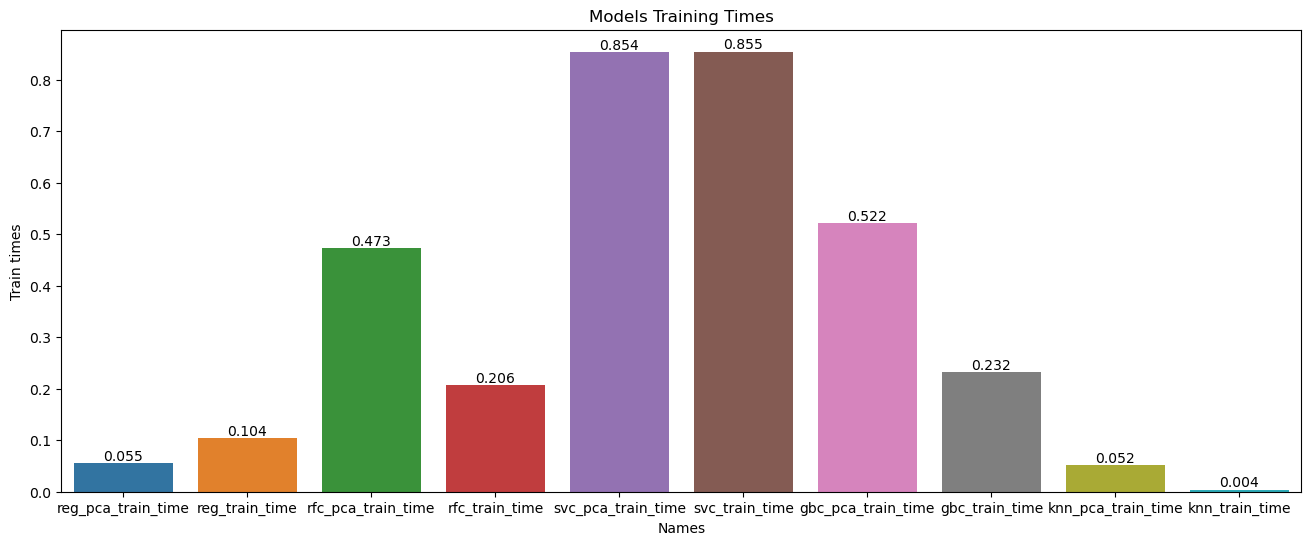

In [70]:
#plot the train time for each model exept ANN model
names = ['reg_pca_train_time', 'reg_train_time', 'rfc_pca_train_time', 'rfc_train_time', 'svc_pca_train_time', 'svc_train_time', 'gbc_pca_train_time', 'gbc_train_time', 'knn_pca_train_time', 'knn_train_time']
train_times = [reg_pca_train_time, reg_train_time, rfc_pca_train_time, rfc_train_time, svc_pca_train_time, svc_train_time, gbc_pca_train_time, gbc_train_time, knn_pca_train_time, knn_train_time]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(16, 6))

# Add the rounded values on top of each bar
for i, v in enumerate(train_times):
    ax.text(i, v, str(round(v, 3)), ha='center', va='bottom')

# Plot the bar plot
sns.barplot(x=names, y=train_times, ax=ax)

# Customize the plot
ax.set(xlabel='Names', ylabel='Train times', title='Models Training Times')


# Show the plot
plt.show();

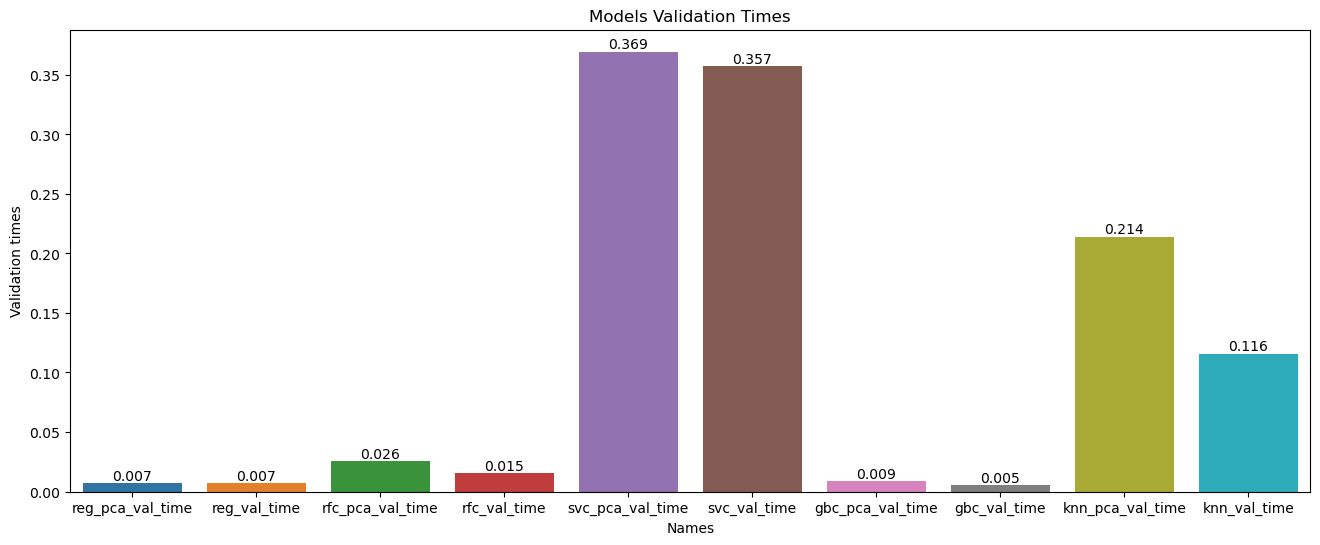

In [71]:
#plot the val time for each model exept ANN model
names = ['reg_pca_val_time', 'reg_val_time', 'rfc_pca_val_time', 'rfc_val_time', 'svc_pca_val_time', 'svc_val_time', 'gbc_pca_val_time', 'gbc_val_time', 'knn_pca_val_time', 'knn_val_time']
val_times = [reg_pca_val_time, reg_val_time, rfc_pca_val_time, rfc_val_time, svc_pca_val_time, svc_val_time, gbc_pca_val_time, gbc_val_time, knn_pca_val_time, knn_val_time]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(16, 6))

# Add the rounded values on top of each bar
for i, v in enumerate(val_times):
    ax.text(i, v, str(round(v, 3)), ha='center', va='bottom')

# Plot the bar plot
sns.barplot(x=names, y=val_times, ax=ax)

# Customize the plot
ax.set(xlabel='Names', ylabel='Validation times', title='Models Validation Times')


# Show the plot
plt.show();

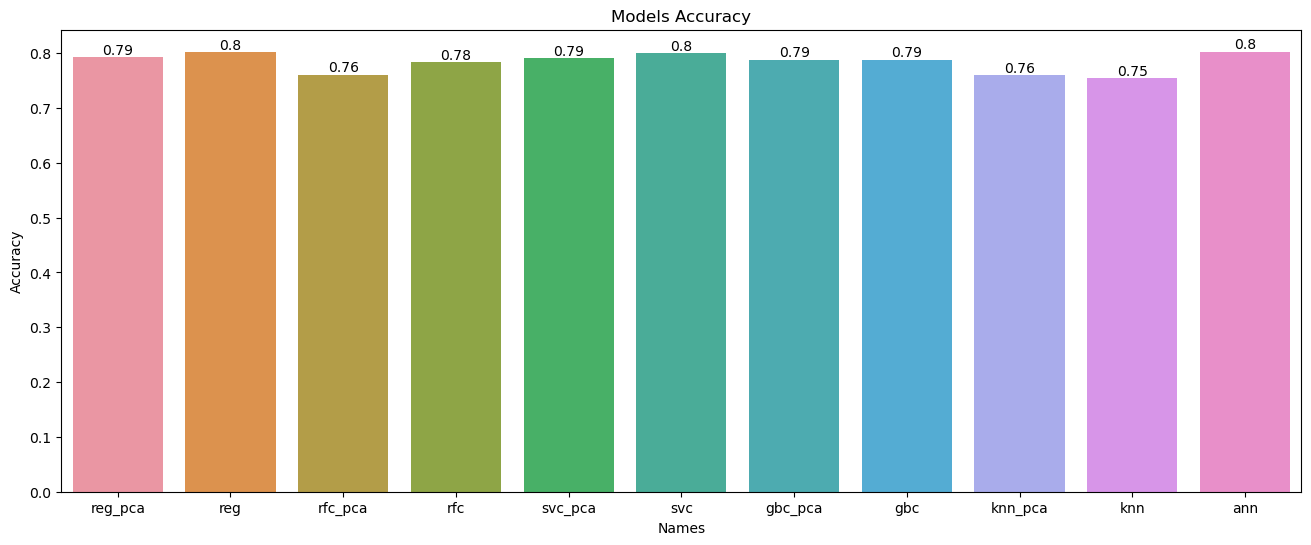

In [72]:
#plot the accuracy for each model 
names = ['reg_pca', 'reg', 'rfc_pca', 'rfc', 'svc_pca', 'svc', 'gbc_pca','gbc', 'knn_pca', 'knn', 'ann']
accuracy = [accuracy_reg_pca, accuracy_reg, accuracy_rfc_pca, accuracy_rfc, accuracy_svc_pca, accuracy_svc, accuracy_gbc_pca,accuracy_gbc, accuracy_knn_pca, accuracy_knn, accuracy_ann]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(16, 6))

# Add the rounded values on top of each bar
for i, v in enumerate(accuracy):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Plot the bar plot
sns.barplot(x=names, y=accuracy, ax=ax)

# Customize the plot
ax.set(xlabel='Names', ylabel='Accuracy', title='Models Accuracy')


# Show the plot
plt.show();